# Species Segmentation with Cluster Analysis

The Iris flower dataset is one of the most popular ones for machine learning. You can read a lot about it online and have probably already heard of it: https://en.wikipedia.org/wiki/Iris_flower_data_set

There are 4 features: sepal length, sepal width, petal length, and petal width.

Let's start by creating 2 clusters, and then standardize the data and see if there is a difference. 

Use the Elbow method to determine how many clusters there could be.

Then, plot the data with 2, 3 and 5 clusters and see which solution fits the problem best. 

Finally, import the CSV with the correct answers (iris_with_answers.csv) and check if the clustering worked as expected. Note that this is not how we usually go about clustering problems. If we have the answers prior to that, we would go for classification (e.g. a logistic regression).

## Import the relevant libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'iris_dataset.csv'</i>.

In [7]:
data = pd.read_csv('iris-dataset.csv')
data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Plot the data

Let's try to cluster the iris flowers by the shape of their sepal. 

<i> Use the 'sepal_length' and 'sepal_width' variables.</i> 

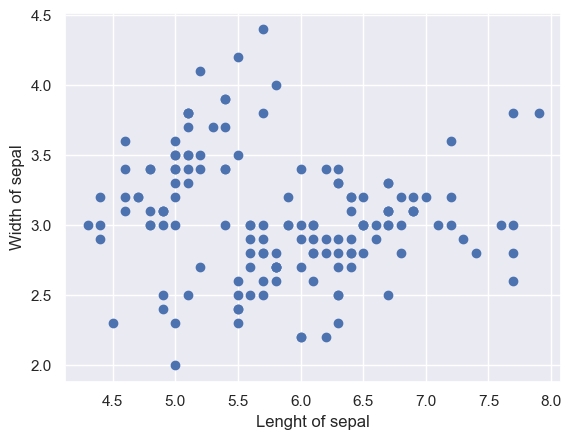

In [10]:
plt.scatter(data['sepal_length'],data['sepal_width'])
plt.xlabel('Lenght of sepal')
plt.ylabel('Width of sepal')
plt.show()

## Clustering (unscaled data)

In [13]:
x = data.copy()
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

In [15]:
clusters = data.copy()
clusters['cluster_pred']=kmeans.fit_predict(x)

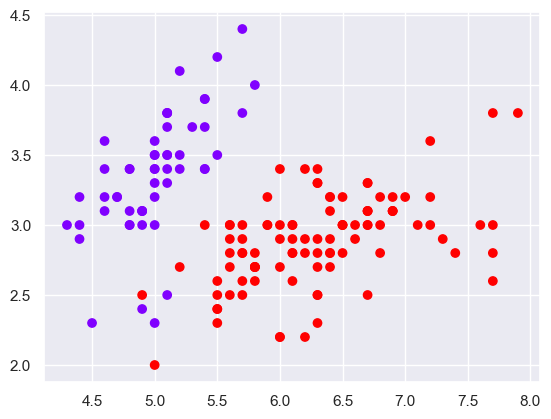

In [17]:
plt.scatter(clusters['sepal_length'], clusters['sepal_width'], c= clusters ['cluster_pred'], cmap = 'rainbow')

## Standardize the variables

Import and use the <i> scale </i> method from sklearn to standardize the data. 

In [19]:
from sklearn import preprocessing

x_scaled = preprocessing.scale(data)
x_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

## Clustering (scaled data)

In [21]:
kmeans_scaled = KMeans(2)
kmeans_scaled.fit(x_scaled)

KMeans(n_clusters=2)

In [23]:
clusters_scaled = data.copy()
clusters_scaled['cluster_pred']=kmeans_scaled.fit_predict(x_scaled)

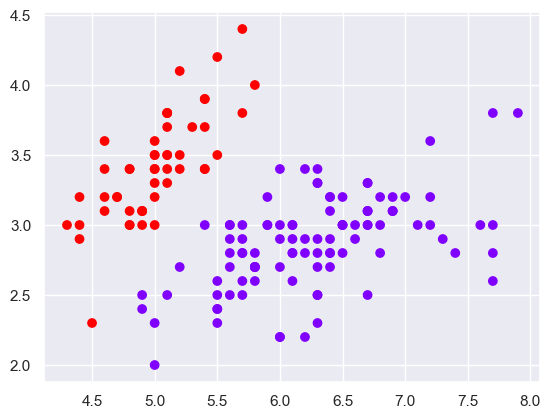

In [25]:
plt.scatter(clusters_scaled['sepal_length'], clusters_scaled['sepal_width'], c= clusters_scaled ['cluster_pred'], cmap = 'rainbow')

Looks like the two solutions are identical. That is because the original features have very similar scales to start with!

## Take Advantage of the Elbow Method

### WCSS

In [27]:
wcss = []

cl_num = 10
for i in range (1,cl_num):
    kmeans= KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

[600.0,
 223.73200573676345,
 141.2208872836681,
 115.68072324860236,
 96.22910183090738,
 81.33968346859855,
 72.94829517961435,
 67.16243220942253,
 55.515636227942025]

### The Elbow Method

Text(0, 0.5, 'Within-cluster Sum of Squares')

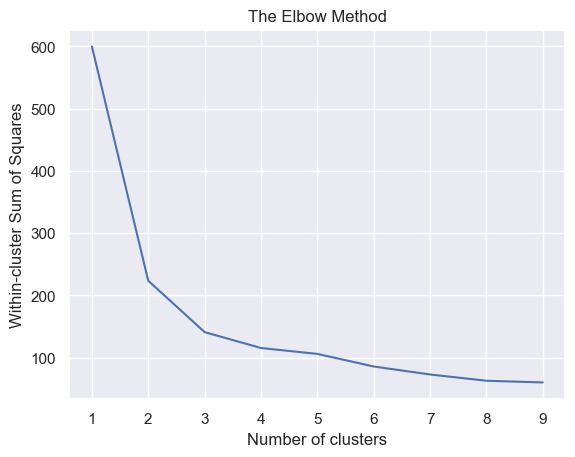

In [34]:
number_clusters = range(1,cl_num)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

## Understanding the Elbow Curve

Construct and compare the scatter plots to determine which number of clusters is appropriate for further use in our analysis. Based on the Elbow Curve, 2, 3 or 5 seem the most likely.

## 2 clusters

Start by separating the standardized data into 2 clusters (you've already done that!)

In [62]:
kmeans_2 = KMeans(2)
kmeans_2.fit(x_scaled)

KMeans(n_clusters=2)

In [64]:
clusters_2 = x.copy()
clusters_2['cluster_pred'] = kmeans_2.fit_predict(x_scaled)

Construct a scatter plot of the original data using the standardized clusters

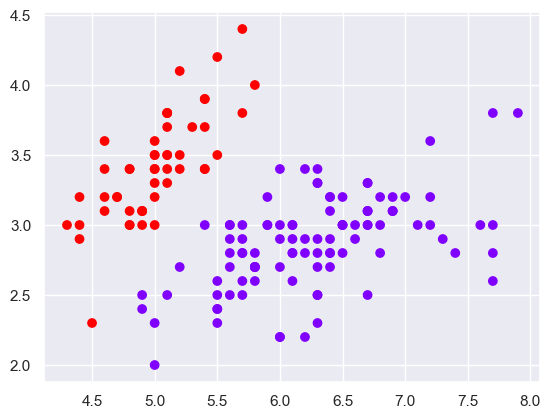

In [67]:
plt.scatter(clusters_2['sepal_length'], clusters_2['sepal_width'], c= clusters_2['cluster_pred'], cmap = 'rainbow')

## 3 clusters
Redo the same for 3 and 5 clusters

In [69]:
kmeans_3 = KMeans(3)
kmeans_3.fit(x_scaled)

KMeans(n_clusters=3)

In [71]:
clusters_3 = x.copy()
clusters_3['cluster_pred'] = kmeans_3.fit_predict(x_scaled)

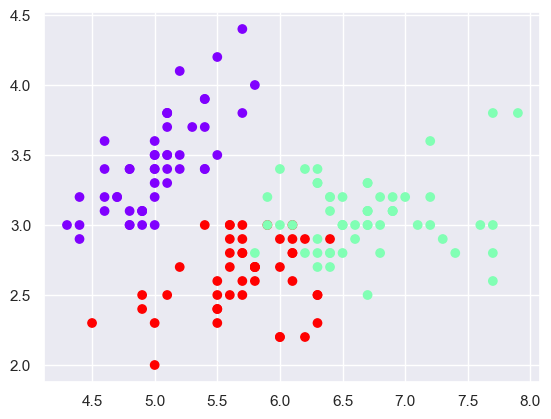

In [73]:
plt.scatter(clusters_3['sepal_length'],clusters_3['sepal_width'], c=clusters_3['cluster_pred'],cmap='rainbow')

## 5 clusters

In [75]:
kmeans_5 = KMeans(5)
kmeans_5.fit(x_scaled)

KMeans(n_clusters=5)

In [77]:
clusters_5 = x.copy()
clusters_5['cluster_pred'] = kmeans_5.fit_predict(x_scaled)

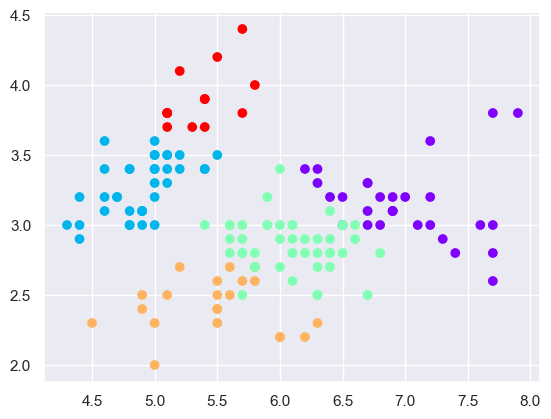

In [81]:
plt.scatter(clusters_5['sepal_length'],clusters_5['sepal_width'],c=clusters_5['cluster_pred'],cmap='rainbow')

## Compare your solutions to the original iris dataset

The original (full) iris data is located in <i>iris_with_answers.csv</i>. Load the csv, plot the data and compare it with your solution. 

Obviously there are only 3 types, because that's the original (truthful) iris dataset.

The 2-cluster solution seemed good, but in real life the iris dataset has 3 SPECIES (a 3-cluster solution). Therefore, clustering cannot be trusted at all times. Sometimes it seems like x clusters are a good solution, but in real life, there are more (or less).

In [83]:
real_data = pd.read_csv('iris-with-answers.csv')

In [85]:
real_data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [87]:
real_data['species'] = real_data['species'].map({'setosa':0, 'versicolor':1, 'virginica':2})
real_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


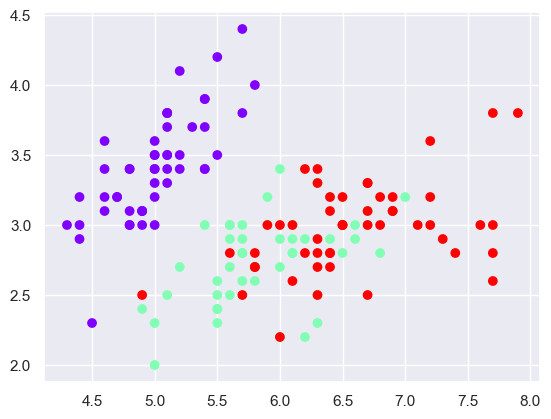

In [89]:
plt.scatter(real_data['sepal_length'], real_data['sepal_width'], c=real_data['species'], cmap='rainbow')

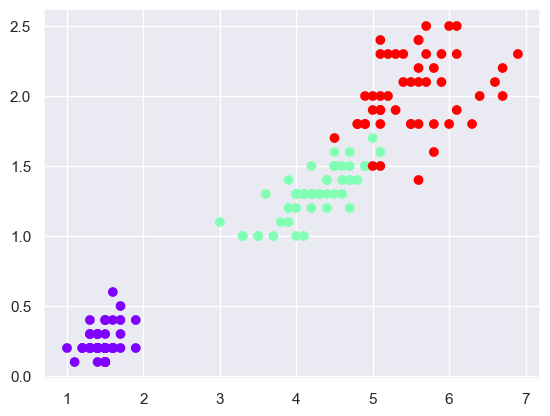

In [91]:
plt.scatter(real_data['petal_length'], real_data['petal_width'], c=real_data['species'], cmap='rainbow')

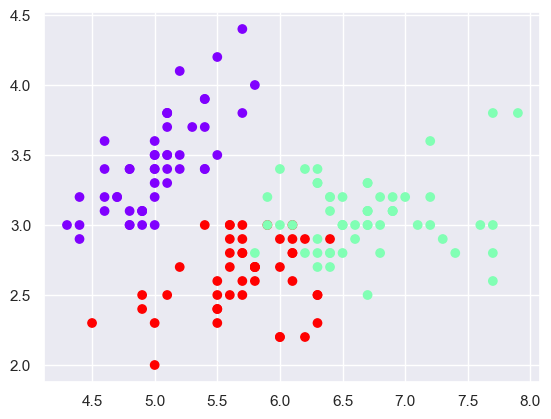

In [93]:
plt.scatter(clusters_3['sepal_length'],clusters_3['sepal_width'], c=clusters_3['cluster_pred'],cmap='rainbow')

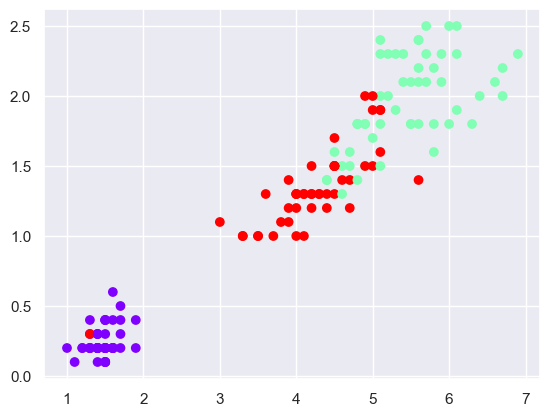

In [95]:
plt.scatter(clusters_3['petal_length'],clusters_3['petal_width'], c=clusters_3['cluster_pred'],cmap='rainbow')

### Further Clarifications

In fact, if you read about it, the original dataset has 3 sub-species of the Iris flower. Therefore, the number of clusters is 3. 

This shows us that:

1. The elbow method is imperfect (we might have opted for 2 or even 4)
2. k-means is very useful in moments where we already know the number of clusters - in this case, 3.
3. Biology cannot always be quantified (or better) ... quantified with k-means! Other methods are much better at that.

Finally, you can try to classify them (instead of cluster them, now that you have all the data)